In [26]:
# import libraries etc.

import numpy as np
import scipy.optimize as optimize
import scipy.stats as stats
import matplotlib.pylab as plt
%matplotlib inline

## Load in a dataset

### Questions

1. What variable would you change to read in a *different* input file?
2. What would happen if your input file had a line like "2 7 8"?
3. What would happen if your input file had a line like "A B"?
1. What does `l.split()` do in this program?  How would you modify the program so it would deal with a file that had "`,`" between `x` and `y` rather than a space?

In [33]:

DATA_FILE = "dataset_1.txt"

def load_data(data_file):
    """
    Read a data file of the form:

    x1 y1
    x2 y2
    x3 y3
    ...
    xN yN
    
    and return x and y as numpy arrays.   
    """

    # Open the file and read all lines into a list "lines"
    f = open(data_file,"r")
    lines = f.readlines()
    f.close()

    # Walk though each line in the file, splitting on " ", and appending each x and y value
    # as a float to x_list and y_list.
    x_list = []
    y_list = []
    for l in lines:
        
        # Skip blank lines
        if l.strip() == "":
            continue
        
        columns = l.split()
        x_list.append(float(columns[0]))
        y_list.append(float(columns[1]))
        
    # Convert x_list and y_list to numpy arrays
    x_array = np.array(x_list)
    y_array = np.array(y_list)
        
    return x_array, y_array

# Call load_data function, loading x and y data into numpy arrays
x, y = load_data(DATA_FILE)



In [34]:
def plot_fit(x,y,fit_model,fit_residuals,fit_param):

    # create plots
    f, ax = plt.subplots(2, sharex=True,figsize=(7,14))

    # Create population plots
    ax[0].set_title("Fit Result")
    ax[0].set_xlim(0,10)
    ax[0].set_ylim(0,1.1)
    ax[0].plot(x,y,"bo")
    ax[0].plot(x,fit_model(*fit_param,x))

    ax[0].set_xlabel("[X] (mM)")
    ax[0].set_ylabel("binding fraction")

    r = fit_residuals(fit_param,x,y)
    lim = max(abs(r))

    ax[1].set_xlim(0,10)
    ax[1].set_ylim(-lim,lim)

    ax[1].plot(x,r)
    ax[1].plot([0,10],[0,0],"--")

    ax[1].set_xlabel("[X] (mM)")
    ax[1].set_ylabel("residuals")


    plt.show()

    print(fit_param)
    print("square residuals:",sum(r**2))

Fit to model that looks like:

$$\bar{X} = b + m[X]$$

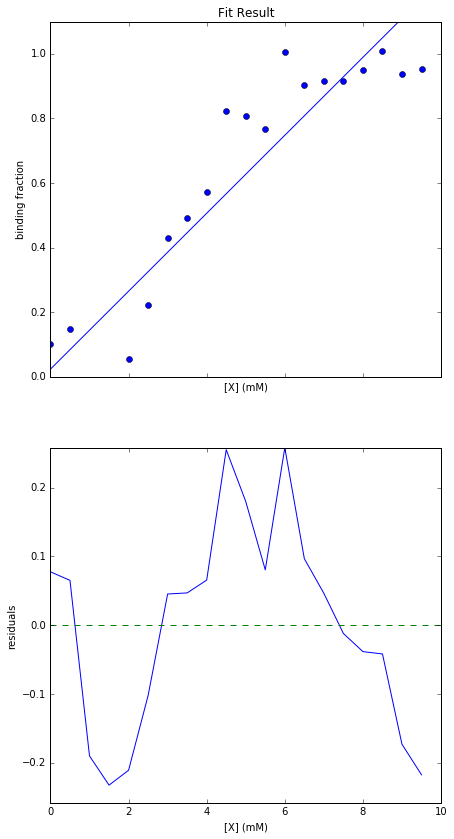

[ 0.02334286  0.12074887]
square residuals: 0.426750565414


In [35]:

def linear_binding(b,m,x):
    """
    Linear binding curve.
    """
    return b + m*x
    
def linear_residuals(args,x,obs):
    """
    Residuals for linear binding curve.
    """
    return obs - linear_binding(args[0],args[1],x)


b_guess = 0.0
m_guess = 1.0

fit_param, covariance, info_dict, message, error = optimize.leastsq(linear_residuals,
                                                                    (b_guess,m_guess),
                                                                    args=(x,y),
                                                                    full_output=True)

plot_fit(x,y,linear_binding,linear_residuals,fit_param)



Fit to model that looks like:

$$\bar{X} = \frac{1}{1 + Kd/[X]}$$

In [42]:

def ss_binding(kd,x):
    """
    Single site binding curve.
    """
    return 1.0/(1 + kd/x)
    
def ss_residuals(kd,x,obs):
    """
    Residuals for single site binding curve.
    """
    return obs - ss_binding(kd,x)


kd_guess = 1000.

fit_param, covariance, info_dict, message, error = optimize.leastsq(ss_residuals,
                                                                    kd_guess,args=(x,y),
                                                                    full_output=True)





/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


Fit to model that looks like:

$$\bar{X} = \frac{1}{1 + (Kd/[X])^{n}}$$

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


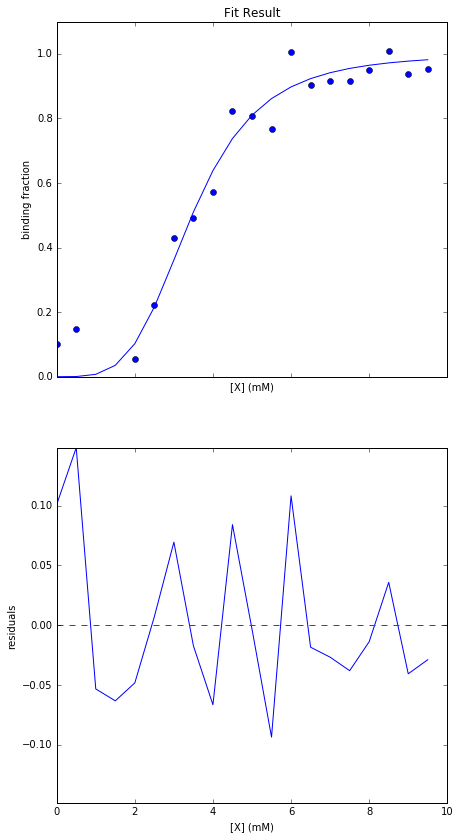

[ 3.46416196  3.95508598]
square residuals: 0.0850486783314


In [37]:

def hill_binding(kd,n,x):
    """
    Hill binding curve.
    """
    
    return 1.0/(1.0 + (kd/x)**n)
    
def hill_residuals(args,x,obs):
    """
    Residuals for Hill binding curve.
    """
    
    
    return obs - hill_binding(args[0],args[1],x)


kd_guess = 1.0
n_guess = 1.0

fit_param, covariance, info_dict, message, error = optimize.leastsq(hill_residuals,
                                                                    x0=np.array((kd_guess,n_guess)),
                                                                    args=(x,y),full_output=True)



plot_fit(x,y,hill_binding,hill_residuals,fit_param)


Fit to model that looks like:

$$\bar{X} = a + b[X] + c[X]^{2} + d[X]^{3}$$

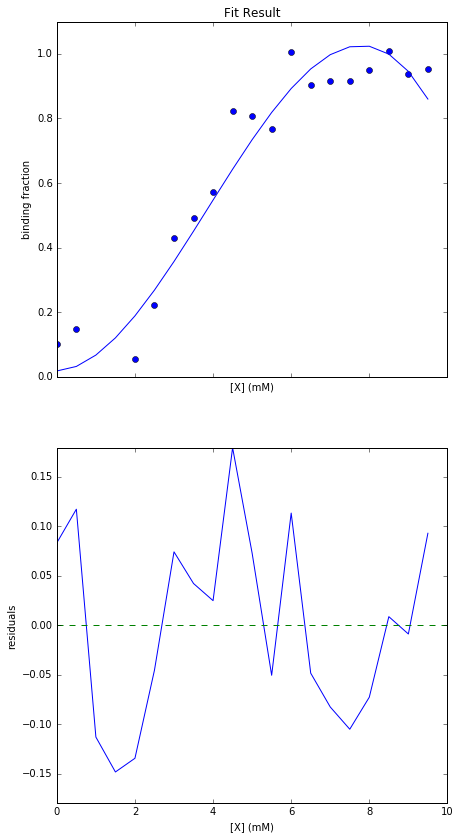

[ 0.01771564  0.00477242  0.0486705  -0.00419362]
square residuals: 0.170575752299


In [38]:

def third_poly_binding(a,b,c,d,x):
    """
    Third order polynomial curve.
    """
    
    return a + b*x + c*(x**2) + d*(x**3)
    
    
def third_poly_residuals(args,x,obs):
    """
    Residuals for third order poly.
    """
    
    
    return obs - third_poly_binding(args[0],args[1],args[2],args[3],x)


a_guess = 1.0
b_guess = 1.0
c_guess = 1.0
d_guess = 1.0

fit_param, covariance, info_dict, message, error = optimize.leastsq(third_poly_residuals,
                                                                    x0=np.array((a_guess,b_guess,c_guess,d_guess)),
                                                                    args=(x,y),full_output=True)


plot_fit(x,y,third_poly_binding,third_poly_residuals,fit_param)
